# Jarvis Ratings

## Community challenge
Onderzoeksvraag:
### Notebook opbouw
1. inladen datesat
2. Onderzoeken wat de verschillende ratings zin
3. Visualisatie
4. Connectie DB
5. Conclusie

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
Jarvis = pd.read_csv('./ratings.csv')

## Dataset Inladen
Met ```pandas``` csv bestand ingeladen

### Overzicht Jarvis dataset exercise ratings
Hieronder een verkorte weergaven van de dataset. 

In [3]:
Jarvis.head()

,exercise,first_name,last_name,rating,date
0,Flex met boxen,Fergus,Crowther,5,2021-10-29
1,Commandline commands,Monica,Bartaloni,5,2021-01-05
2,Read that data,Prissie,Prangle,5,2021-10-26
3,Maak een kattenwebsite,Florida,Ambrogiotti,3,2021-07-17
4,Maak een kattenwebsite,Sherrie,Hadfield,4,2021-10-21


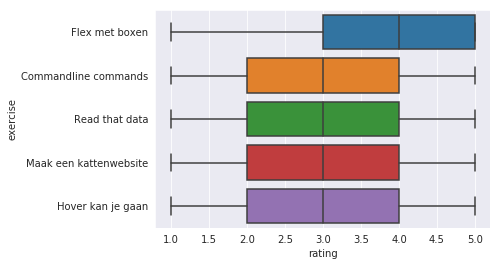

In [4]:
sns.set_style('darkgrid')

sns.boxplot(Jarvis['rating'],Jarvis['exercise'])

## Aantal gemaakte beoordelingen
-Hoeveel ratings zijn er totaal gegeven?

Het aantal beoordelingen die zijn gemaakt over opdrachten wordt achterhaalt door de kolom 'rating' te selcteren waarna met len() het aantal waardes geteld kan worden.

Hieronder een aantal gegevens die opgemaakt kunnen worden uit de dataset.

In [5]:
Excercise_dataset_size = len(Jarvis['rating'])
print("In totaal zijn er over de opdrachten", Excercise_dataset_size, "ratings gegeven in Jarvis.")
UniQueExcercises = Jarvis['exercise'].unique()
print('Er zijn in dit databestand', len(UniQueExcercises),'opdrachten uit Jarvis, namelijk:',UniQueExcercises)

('In totaal zijn er over de opdrachten', 1000, 'ratings gegeven in Jarvis.')
('Er zijn in dit databestand', 5, 'opdrachten uit Jarvis, namelijk:', array(['Flex met boxen', 'Commandline commands', 'Read that data',
       'Maak een kattenwebsite', 'Hover kan je gaan'], dtype=object))


## Rating per opdracht
Laat per opdracht zien hoeveel ratings de opdracht heeft en geef de namen van de opdrachten met een gemiddelde rating lager dan 3.

## Laag beoordeelde opdrachten
In dit onderzoek definieren we laag beoordeelde opdrachten als opdrachten die gemiddeld lager scoren dan een 3 op de rating. 

In [6]:

ExRating = Jarvis.groupby(['exercise'])[['rating']].count().sort_values(by='rating',ascending=False)
# 
ExRating

,rating
exercise,
Hover kan je gaan,216
Read that data,204
Maak een kattenwebsite,198
Flex met boxen,193
Commandline commands,189


In [7]:
LowRating = Jarvis.groupby('exercise')['rating'].mean()
LowRating 

exercise
Commandline commands      3.116402
Flex met boxen            3.704663
Hover kan je gaan         3.023148
Maak een kattenwebsite    2.989899
Read that data            2.921569
Name: rating, dtype: float64

In [8]:
sum(LowRating < 3)

print("Er zijn",sum(LowRating < 3), "opdrachten met gemiddelde beoordeling lager dan 3.")
print("Dit zijn: ","\n", LowRating.tail(2))

('Er zijn', 2, 'opdrachten met gemiddelde beoordeling lager dan 3.')
('Dit zijn: ', '\n', exercise
Maak een kattenwebsite    2.989899
Read that data            2.921569
Name: rating, dtype: float64)


In [77]:
ratingverdeling = Jarvis.groupby('exercise')['rating'].value_counts()
ratingverdeling



exercise                rating
Commandline commands    5         46
                        2         38
                        3         38
                        4         34
                        1         33
Flex met boxen          5         77
                        4         44
                        3         31
                        1         21
                        2         20
Hover kan je gaan       4         52
                        1         48
                        5         43
                        2         37
                        3         36
Maak een kattenwebsite  3         46
                        1         44
                        5         40
                        4         37
                        2         31
Read that data          2         47
                        1         44
                        5         41
                        4         37
                        3         35
Name: rating, dtype: int64

In [9]:
a = Jarvis[Jarvis['exercise'] == 'Flex met boxen']['rating'].value_counts()
b = Jarvis[Jarvis['exercise'] == 'Commandline commands']['rating'].value_counts()
c = Jarvis[Jarvis['exercise'] == 'Read that data']['rating'].value_counts()
d = Jarvis[Jarvis['exercise'] == 'Maak een kattenwebsite']['rating'].value_counts()
e = Jarvis[Jarvis['exercise'] == 'Hover kan je gaan']['rating'].value_counts()

In [10]:
# Jarvis[['exercise', 'rating']].sort_values(by='exercise')


# #     print(f(Ex_ + {opdracht} = Jarvis[Jarvis['exercise'] == "'" + {opdracht} + "'"])

# Ex_Flex_met_boxen = Jarvis[Jarvis['exercise'] == 'Flex met boxen']
# Ex_Commandline_commands = Jarvis[Jarvis['exercise'] == 'Commandline commands']
# Ex_Read_that_data = Jarvis[Jarvis['exercise'] == 'Read that data']
# Ex_Maak_een_kattenwebsite = Jarvis[Jarvis['exercise'] == 'Maak een kattenwebsite']
# Ex_Hover_kan_je_gaan = Jarvis[Jarvis['exercise'] == 'Hover kan je gaan']


# def printRating (df,col):
#     val = df.col.unique()
#     rat = df.col.shape[0]
#     sums = df.sum()
# #     print( df['exercise'].unique(),df['rating'].shape[0])
#     print(f("De opdracht {val} heeft beoordeling {rat}"))

# printRating(Ex_Flex_met_boxen),
# # printRating(Ex_Commandline_commands),
# # printRating(Ex_Read_that_data),
# # printRating(Ex_Maak_een_kattenwebsite),
# # printRating(Ex_Hover_kan_je_gaan),

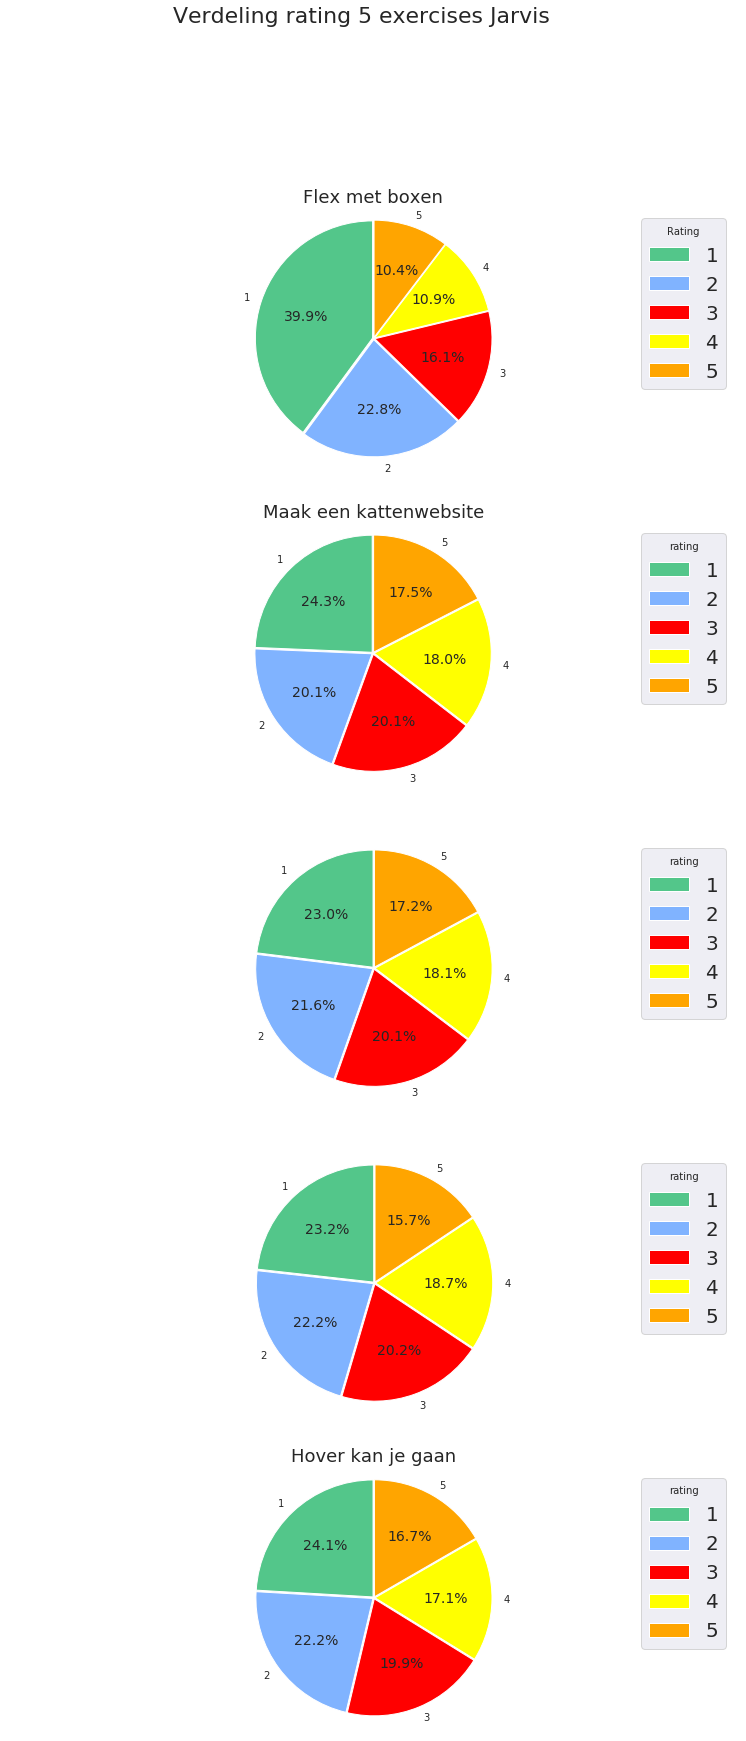

In [11]:
fig, axs = plt.subplots(5, figsize=(13,28))

valuesA = np.array(a)
labels=["1", "2","3","4","5"]
kleuren=['#53c68a', '#80b3ff','red','yellow','orange']
explode=(0.01, 0.01, 0.01, 0.01, 0.01)

valuesB = np.array(b)
labels=["1", "2","3","4","5"]
kleuren=['#53c68a', '#80b3ff','red','yellow','orange']
explode=(0.01, 0.01, 0.01, 0.01, 0.01)

valuesC = np.array(c)
labels=["1", "2","3","4","5"]
kleuren=['#53c68a', '#80b3ff','red','yellow','orange']
explode=(0.01, 0.01, 0.01, 0.01, 0.01)

valuesD = np.array(d)
labels=["1", "2","3","4","5"]
kleuren=['#53c68a', '#80b3ff','red','yellow','orange']
explode=(0.01, 0.01, 0.01, 0.01, 0.01)

valuesE = np.array(e)
labels=["1", "2","3","4","5"]
kleuren=['#53c68a', '#80b3ff','red','yellow','orange']
explode=(0.01, 0.01, 0.01, 0.01, 0.01)


axs[0].pie(valuesA, explode=explode, labels=labels, startangle = 90, colors=kleuren, textprops={'fontsize': 14},autopct='%1.1f%%')
axs[0].legend(title='rating',fontsize=20)
axs[0].set_title('Flex met boxen', fontsize=18)
axs[0].axis('equal')

axs[1].pie(valuesB, explode=explode, labels=labels, startangle = 90, colors=kleuren, textprops={'fontsize': 14}, autopct='%1.1f%%')
axs[1].legend(title='rating',fontsize=20)
axs[1].set_title('Commandline commands', fontsize=18)
axs[1].axis('equal')

axs[2].pie(valuesC, explode=explode, labels=labels, startangle = 90, colors=kleuren, textprops={'fontsize': 14},autopct='%1.1f%%')
axs[2].legend(title='rating',fontsize=20)
axs[1].set_title('Read that data', fontsize=18)
axs[2].axis('equal')

axs[3].pie(valuesD, explode=explode, labels=labels, startangle = 90, colors=kleuren, textprops={'fontsize': 14},autopct='%1.1f%%')
axs[3].legend(title='rating',fontsize=20)
axs[1].set_title('Maak een kattenwebsite', fontsize=18)
axs[3].axis('equal')

axs[4].pie(valuesE, explode=explode, labels=labels, startangle = 90, colors=kleuren, textprops={'fontsize': 14},autopct='%1.1f%%')
axs[4].legend(title='rating',fontsize=20)
axs[4].set_title('Hover kan je gaan', fontsize=18)
axs[4].axis('equal')

axs[0].legend(title="Rating",fontsize=20)

fig.suptitle("Verdeling rating 5 exercises Jarvis", fontsize=22)

plt.show();

In [12]:
LowRating.tail(2)

exercise
Maak een kattenwebsite    2.989899
Read that data            2.921569
Name: rating, dtype: float64

<Figure size 720x432 with 0 Axes>

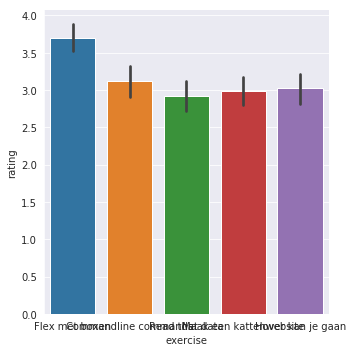

In [13]:
plt.figure(figsize=(10,6))
sns.catplot(data=Jarvis, x='exercise',  y='rating',kind='bar', legend_out=False)
plt.tight_layout()

## Verdieping herziende opdracht
Op 1 mei 2021 is de opdracht Flex met boxen herzien, heeft dat geleid tot betere ratings?


In [14]:
Ex_Flex_met_boxen = Jarvis[Jarvis['exercise'] == 'Flex met boxen']
Ex_Flex_met_boxen.head()

,exercise,first_name,last_name,rating,date
0,Flex met boxen,Fergus,Crowther,5,2021-10-29
7,Flex met boxen,Shelba,Yurevich,5,2021-10-08
9,Flex met boxen,Kristofor,Bickley,5,2021-05-27
12,Flex met boxen,Jayme,Daelman,4,2021-10-16
16,Flex met boxen,Cheri,Mays,4,2021-01-09


In [15]:
from datetime import date

In [16]:
Jarvis['date'] = Jarvis['date'] .astype({'date': 'datetime64[ns]'})


In [17]:

pd.to_datetime(Jarvis['date'])
Jarvis['month'] = Jarvis.date.dt.month_name()
Jarvis['year'] = Jarvis.date.dt.year


In [18]:
Jarvis.head()

,exercise,first_name,last_name,rating,date,month,year
0,Flex met boxen,Fergus,Crowther,5,2021-10-29,October,2021
1,Commandline commands,Monica,Bartaloni,5,2021-01-05,January,2021
2,Read that data,Prissie,Prangle,5,2021-10-26,October,2021
3,Maak een kattenwebsite,Florida,Ambrogiotti,3,2021-07-17,July,2021
4,Maak een kattenwebsite,Sherrie,Hadfield,4,2021-10-21,October,2021


In [41]:
Flex = Jarvis[Jarvis['exercise'] == 'Flex met boxen']

Flex_month = Flex['month']

Flex_month

0        October
7        October
9            May
12       October
16       January
28        August
30         March
44          July
58      November
62      November
69          July
70        August
71          June
75          June
83     September
85          June
86      December
87       October
91          June
103          May
108       August
115        April
133     November
148     December
156    September
159     December
161     December
166    September
171     December
201          May
         ...    
844        April
856        March
857     November
862     December
866        March
872       August
892      January
897     February
903       August
906     November
923     November
924    September
927      October
934    September
935      January
936     December
941      October
945        March
949     December
953      October
957         July
960    September
962     February
967    September
970       August
978      October
980     December
995        Apr

In [20]:
Flex = Jarvis[Jarvis['exercise'] == 'Flex met boxen']
FlexRating = Flex.groupby('month')['rating'].mean()
FlexRating.sort_values(ascending=False)

month
May          4.764706
August       4.750000
November     4.615385
September    4.533333
October      4.210526
July         4.142857
June         4.000000
February     3.062500
April        2.923077
January      2.800000
December     2.772727
March        2.285714
Name: rating, dtype: float64

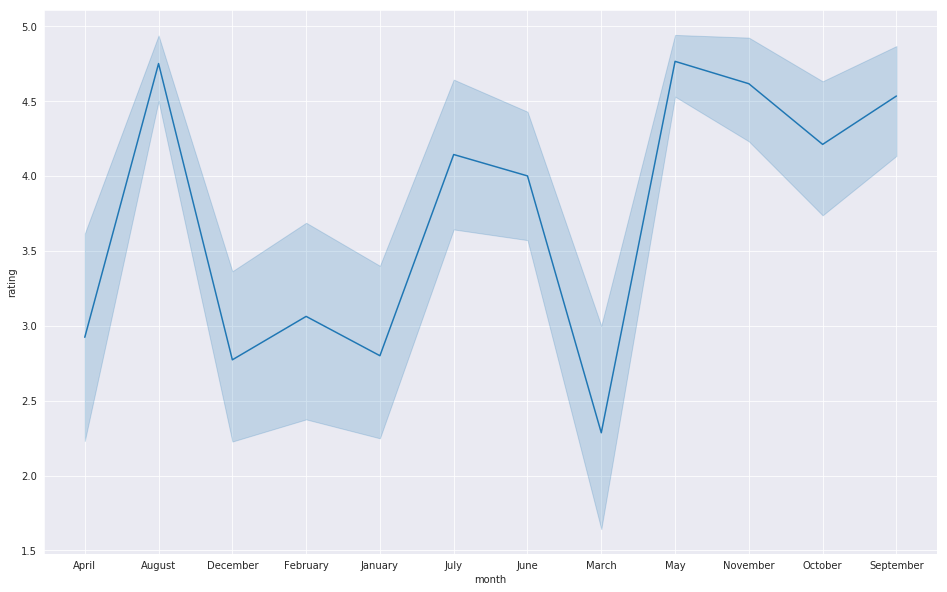

In [21]:
plt.figure(figsize=(16, 10))

sns.lineplot(data=Jarvis[Jarvis['exercise'] == 'Flex met boxen'], x='month',y='rating')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)

## __Bonus__
Web traject: Maak een webpagina waarop je alle bovenstaande antwoorden overzichtelijk weergeeft.
Data traject: Maak een grafiek waarin je laat zien wat de invloed was van de herzage.
Upskill: Vrije keuze, kies 1 van beide trajecten, of combineer ze!